In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten,Dropout

In [2]:
from tensorflow.keras.preprocessing .image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 ,shear_range = 0.1,zoom_range = 0.1)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
# Train-Test Split  RUN ONLY ONCE
import splitfolders
splitfolders.ratio(r'C:\Users\surya\Desktop\Snake\ImagesNew', output=r"C:\Users\surya\Desktop\Snake\ImagesNew\ImagesNew_split", ratio=(0.8, 0.2))

Copying files: 2046 files [00:11, 178.82 files/s]


In [37]:
x_train = train_datagen.flow_from_directory(r'C:\Users\surya\Desktop\Snake\ImagesNew\ImagesNew_split\train',target_size = (64,64),batch_size = 20,class_mode = "categorical",color_mode="grayscale")
x_test = test_datagen.flow_from_directory(r'C:\Users\surya\Desktop\Snake\ImagesNew\ImagesNew_split\val',target_size = (64,64),batch_size = 20,class_mode = "categorical",color_mode="grayscale")

Found 1636 images belonging to 4 classes.
Found 410 images belonging to 4 classes.


In [38]:
x_train

In [39]:
x_train.class_indices

{'east': 0, 'north': 1, 'south': 2, 'west': 3}

In [40]:
x_test.class_indices

{'east': 0, 'north': 1, 'south': 2, 'west': 3}

In [41]:
len(x_test)

21

In [42]:
len(x_train)

82

In [43]:
x_train


In [56]:
model = Sequential()

In [57]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,1)))

In [58]:
model.add(MaxPooling2D((2,2)))

In [59]:
model.add(Dropout(0.2))

In [60]:
model.add(Flatten())

In [61]:
model.add(Dense(units = 128, kernel_initializer= "random_uniform",activation = "relu"))

In [62]:
model.add(Dropout(0.25))

In [63]:
model.add(Dense(units = 256, kernel_initializer= "random_uniform",activation = "relu"))

In [64]:
model.add(Dropout(0.1))

In [65]:
model.add(Dense(units = 4 , kernel_initializer= "random_uniform",activation = "sigmoid"))

In [66]:
model.compile(optimizer= "adam",loss = "categorical_crossentropy" , metrics =["accuracy"])

In [67]:
model.fit(x_train,steps_per_epoch =15 , epochs = 40 , validation_data = x_test,validation_steps = 3 )

Epoch 1/40
15/15 [==============================] - 2s 76ms/step - loss: 1.3769 - accuracy: 0.3000 - val_loss: 1.3226 - val_accuracy: 0.3333
Epoch 2/40
15/15 [==============================] - 1s 68ms/step - loss: 1.2872 - accuracy: 0.4000 - val_loss: 1.2220 - val_accuracy: 0.4333
Epoch 3/40
15/15 [==============================] - 1s 68ms/step - loss: 1.1672 - accuracy: 0.4967 - val_loss: 1.1511 - val_accuracy: 0.4667
Epoch 4/40
15/15 [==============================] - 1s 68ms/step - loss: 1.0674 - accuracy: 0.5574 - val_loss: 0.8854 - val_accuracy: 0.5500
Epoch 5/40
15/15 [==============================] - 1s 65ms/step - loss: 1.0340 - accuracy: 0.5367 - val_loss: 1.0776 - val_accuracy: 0.5500
Epoch 6/40
15/15 [==============================] - 1s 69ms/step - loss: 0.9696 - accuracy: 0.5833 - val_loss: 0.9124 - val_accuracy: 0.5167
Epoch 7/40
15/15 [==============================] - 1s 68ms/step - loss: 0.8237 - accuracy: 0.6367 - val_loss: 0.8334 - val_accuracy: 0.6000
Epoch 8/40
15

In [68]:
model.save("Hand_Rec_New_grayscale.h5")

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

###  Testing

In [70]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np

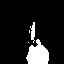

In [71]:
img = image.load_img(r"C:\Users\surya\Desktop\Snake\ImagesNew\ImagesNew_split\val\north\12.png",target_size = (64,64),color_mode="grayscale")
img

In [72]:
x = image.img_to_array(img)

In [73]:
x.shape

(64, 64, 1)

In [74]:
x = np.expand_dims(x,axis = 0)

In [75]:
x.shape

(1, 64, 64, 1)

In [76]:
pred = model.predict(x)

In [77]:
pred

array([[0., 1., 0., 0.]], dtype=float32)